In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Synthetic Data Generation

https://datascienceplus.com/understanding-the-covariance-matrix/

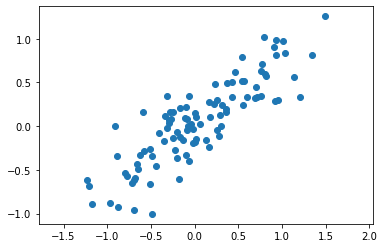

In [20]:
mean = [0, 0]

cov = [[0.4, 0.3], 
       [0.3, 0.3]]


x, y = np.random.multivariate_normal(mean, cov, 100).T 


plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()

### Linear Regression

In [21]:
proportion = int(len(x) * 0.7)
x_train = x[:proportion]
y_train = y[:proportion]

x_test = x[proportion:]
y_test = y[proportion:]

In [377]:
n = len(x_train)
alpha = 0.01
stopper = 1000

#a_0 = np.zeros((n,1))
#a_1 = np.zeros((n,1))

a_0 = 0
a_1 = 0

In [378]:
epochs = 0
while(epochs < stopper):
    y_pred = a_0 + a_1 * x_train
    error = y_pred - y_train
    mean_sq_er = np.sum(error ** 2) / n
    a_0 = a_0 - alpha * 2 * np.sum(error) / n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_train) / n
    epochs += 1
    if (epochs%100 == 0):
        print(mean_sq_er)

0.14485336193201528
0.10071913679133174
0.09171974666642527
0.0898796696927287
0.08950334685662201
0.08942638175235408
0.0894106409126417
0.08940742160859963
0.08940676319908435
0.08940662854169108


R2 Score: 0.7730074018822544


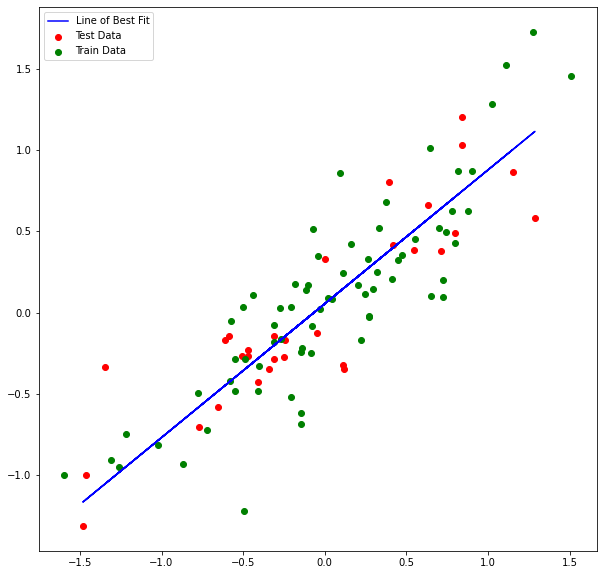

In [379]:
from sklearn.metrics import r2_score

y_prediction = a_0 + a_1 * x_test
print('R2 Score:',r2_score(y_test,y_prediction))

plt.figure(figsize=(10,10))

plt.plot(x_test,y_prediction,color='blue',label='Line of Best Fit')
plt.scatter(x_test,y_test,color='red',label='Test Data')
plt.scatter(x_train,y_train,color='green',label='Train Data')

plt.legend()
plt.show()

### Class Implimentation

In [41]:
class LinearRegression():
    
    def __init__(self, alpha=0.01, stopper=1000):

        self.alpha = alpha
        self.stopper = stopper
        self.a_0 = 0
        self.a_1 = 0
        
    def fit(self, x, y):
        
        n = len(x)
        epochs = 0
        
        while(epochs < self.stopper):
            y_pred = self.a_0 + self.a_1 * x
            error = y_pred - y
            mean_sq_er = np.sum(error ** 2) / n
            self.a_0 = self.a_0 - self.alpha * 2 * np.sum(error) / n
            self.a_1 = self.a_1 - self.alpha * 2 * np.sum(error * x) / n
            epochs += 1
            
            if (epochs%100 == 0):
                print(mean_sq_er)
                
    def predict(self, x):
        y = self.a_0 + self.a_1 * x
        return y

In [42]:
m = LinearRegression()

In [43]:
m.fit(x_train, y_train)

0.1097451454948946
0.08047003442674654
0.07449115952042684
0.0732618590135152
0.07300896661761007
0.07295693911245683
0.07294623546432547
0.07294403339606803
0.07294358036317032
0.07294348716042508


In [44]:
predictions = m.predict(x_test)

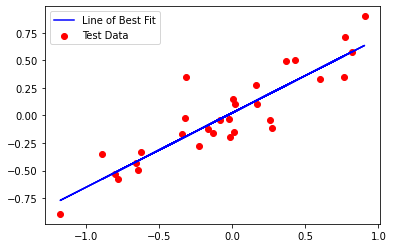

In [45]:
plt.plot(x_test,predictions,color='blue',label='Line of Best Fit')
plt.scatter(x_test,y_test,color='red',label='Test Data')

plt.legend()
plt.show()